# Financial Inclusion in Africa


Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

## Objectives

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

## Data set

We are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . We will train our model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

### Country	
Country interviewee is in.
### Year	
Year survey was done in.
### Uniqueid	
Unique identifier for each interviewee
### Location_type	
Type of location: Rural, Urban
### Cellphone_access	
If interviewee has access to a cellphone: Yes, No
### Household_size	
Number of people living in one house
### Age_of_respondent	
The age of the interviewee
### Gender_of_respondent	
Gender of interviewee: Male, Female
### Relationship_with_head	
The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
### Marital_status	
The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know
### Education_level	
Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
### Job_type	
Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


## Approach

### Importing the dataset

In [76]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [77]:
df = pd.read_csv("./train.csv")
# inspecting the dataset 
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [78]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [79]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

### Checking for Null Data

In [80]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

### Checking for duplicate data

In [81]:
df.duplicated().sum()

0

### Removing unnecessary data

In [82]:
df.drop("uniqueid",axis=1,inplace=True)

### Checking for correlation between variables

In order to use correlation between variables we need to implement one hot encoding on categorical data so that they can be used for analysis too

In [83]:
# can't be executed because categorical data can't be visible
# df.corr().style.background_gradient("coolwarm")


### Converting Categorical Data to Numerical Results using one hot encoding 

In [84]:
# One Hot Encoding
dummy = pd.get_dummies(df.select_dtypes(include="object"),drop_first=True)
dummy = dummy.astype(int)

In [85]:
df = pd.concat([dummy,df.select_dtypes(exclude=object)],axis=1)
# Returing bank_account to original name 
df =df.rename({"bank_account_Yes":"bank_account"},axis=1)
df.columns

Index(['country_Rwanda', 'country_Tanzania', 'country_Uganda', 'bank_account',
       'location_type_Urban', 'cellphone_access_Yes',
       'gender_of_respondent_Male', 'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
      

### Test/Train Split

In [86]:
train_df=df.sample(frac=0.7, random_state=99) #random state is a seed value
test_df=df.drop(train_df.index)

### Starting Analysis by using Linear Regression

#### Define our dependant and independant variable

In [87]:
Y_train = train_df["bank_account"]
X_train = train_df.drop(columns=["bank_account"],axis=1)

In [88]:
Y_test = test_df["bank_account"]
X_test = test_df.drop(columns=["bank_account"],axis=1)

#### Create our model by declaring a logistic regression classifier

In [89]:
classifier = LogisticRegression(max_iter=1000).fit(X_train,Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Make predicitions based on test data

In [90]:
Y_pred = classifier.predict(X_test)

### Checking out our classifier score on test data 

In [91]:
acc_score = classifier.score(X_test,Y_test)
acc_score

0.8840867224032876

### Plotting the Confusion Matrix

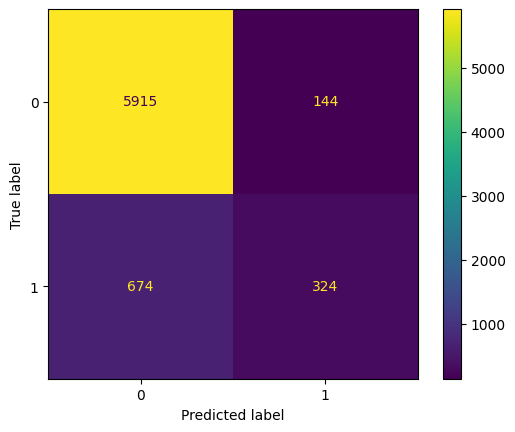

In [92]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred)).plot();